In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install gdown

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer

import gdown

In [ ]:
file_id = "13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "flight_data.csv", quiet=False)

flight_data = pd.read_csv("flight_data.csv")

Downloading...
From (original): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r
From (redirected): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r&confirm=t&uuid=a169795f-efdd-41c7-bdbf-70747051eee9
To: /content/flight_data.csv
100%|██████████| 1.32G/1.32G [00:12<00:00, 104MB/s]


In [ ]:
flight_data.shape
flight_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,...,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,...,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,...,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
print(flight_data.columns.tolist())

['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'index']


In [ ]:
#Goal: See how often each delay reason occurs and how big they tend to be.
delay_cols = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']

# Check missingness
flight_data[delay_cols].isna().sum()

# Summary stats
flight_data[delay_cols].describe()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,7.546988e+06,7.546988e+06,7.546988e+06,7.546988e+06,7.546988e+06
mean,4.995800e+00,9.005415e-01,2.742626e+00,2.418462e-02,5.974389e+00
std,3.550577e+01,1.585831e+01,1.530997e+01,1.390774e+00,3.163105e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.689000e+03,2.419000e+03,2.700000e+03,1.164000e+03,2.690000e+03


Text(0.5, 1.0, 'Distribution of Delay Minutes by Reason')

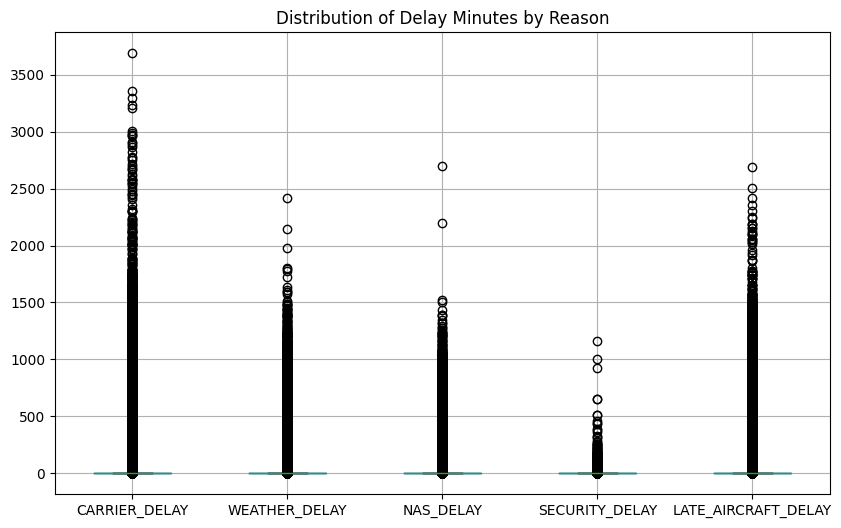

In [ ]:
flight_data[delay_cols].boxplot(figsize=(10,6))
plt.title("Distribution of Delay Minutes by Reason")

##Frequency and Contribution of Each Delay Type

Compute the proportion of total delay minutes that each reason accounts for.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'LATE_AIRCRAFT_DELAY'),
  Text(1, 0, 'CARRIER_DELAY'),
  Text(2, 0, 'NAS_DELAY'),
  Text(3, 0, 'WEATHER_DELAY'),
  Text(4, 0, 'SECURITY_DELAY')])

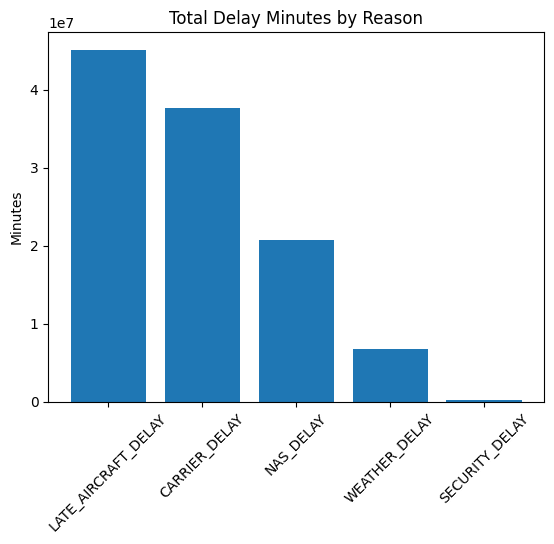

In [ ]:
total_delay = flight_data[delay_cols].sum().sort_values(ascending=False)
plt.bar(total_delay.index, total_delay.values)
plt.title("Total Delay Minutes by Reason")
plt.ylabel("Minutes")
plt.xticks(rotation=45)

<Axes: >

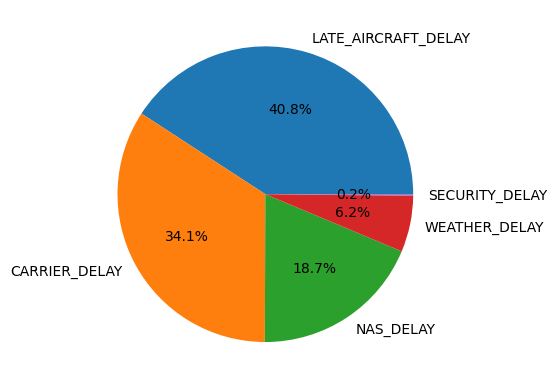

In [ ]:
(total_delay / total_delay.sum()).plot(kind='pie', autopct='%1.1f%%')

##Relationship Between Delay Reason and Day/Month/Season

To see when different delay types are most common.

Text(0, 0.5, 'Minutes')

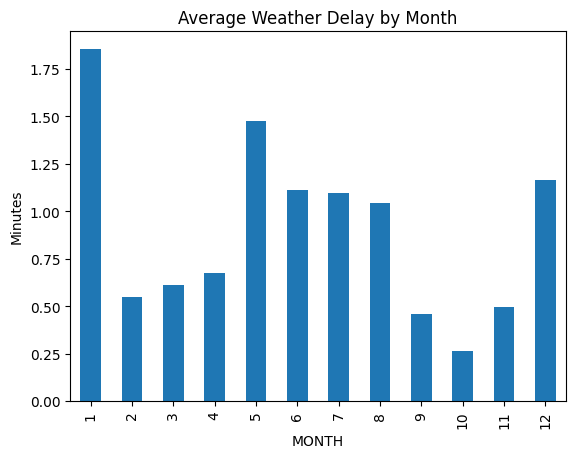

In [ ]:
flight_data.groupby('MONTH')['WEATHER_DELAY'].mean().plot(kind='bar')
plt.title("Average Weather Delay by Month")
plt.ylabel("Minutes")

Text(0.5, 1.0, 'Correlation Between Delay Reasons')

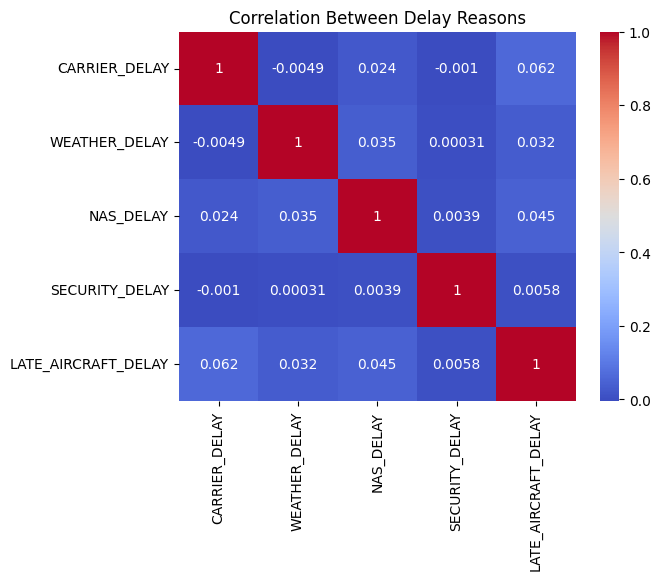

In [ ]:
#correlation between delay reasons

sns.heatmap(flight_data[delay_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Delay Reasons")

Text(0, 0.5, 'Minutes')

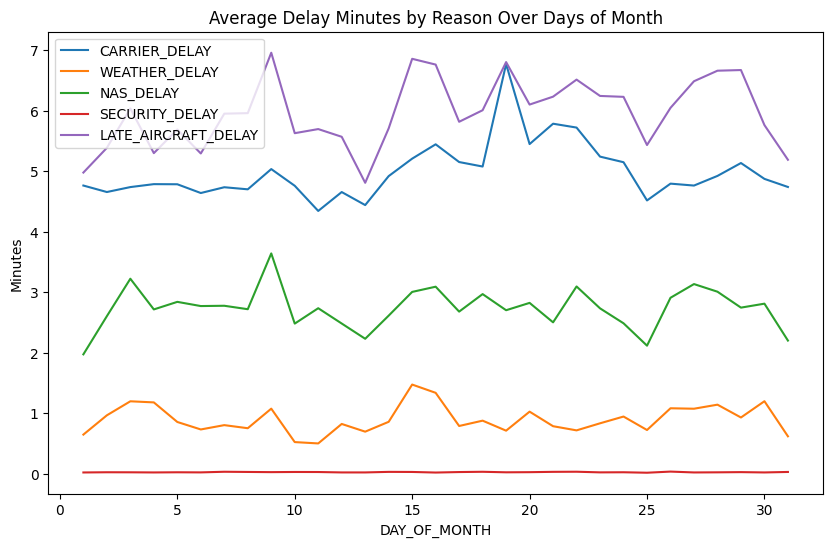

In [ ]:
#line plot over time
delay_over_time = flight_data.groupby('DAY_OF_MONTH')[delay_cols].mean()
delay_over_time.plot(figsize=(10,6))
plt.title("Average Delay Minutes by Reason Over Days of Month")
plt.ylabel("Minutes")
